<a href="https://colab.research.google.com/github/tejaspisal2810/Air-Quality-Forecasting/blob/main/SRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install pandas numpy scikit-learn tensorflow matplotlib

In [6]:
pip install --upgrade tensorflow keras

  Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [4]:
# Load and preprocess data
data = pd.read_csv("/content/drive/MyDrive/Data/SRIP/AirForcasting(2022-23).csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.sort_values(by='Timestamp')

In [5]:
# Extract values
values = data['PM2.5 (Âµg/mÂ³)'].values.reshape(-1, 1)

In [6]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

In [7]:

# Prepare data for LSTM
look_back = 24  # Number of previous timestamps to use as input features
X, y = [], []
for i in range(len(scaled_values) - look_back):
    X.append(scaled_values[i:i + look_back, 0])
    y.append(scaled_values[i + look_back, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [8]:
# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
# Build LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
18/18 [==============================] - 2s 12ms/step - loss: nan
Epoch 2/100
18/18 [==============================] - 0s 12ms/step - loss: nan
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: nan
Epoch 4/100
18/18 [==============================] - 0s 11ms/step - loss: nan
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: nan
Epoch 6/100
18/18 [==============================] - 0s 20ms/step - loss: nan
Epoch 7/100
18/18 [==============================] - 0s 19ms/step - loss: nan
Epoch 8/100
18/18 [==============================] - 0s 19ms/step - loss: nan
Epoch 9/100
18/18 [==============================] - 0s 18ms/step - loss: nan
Epoch 10/100
18/18 [==============================] - 0s 18ms/step - loss: nan
Epoch 11/100
18/18 [==============================] - 0s 20ms/step - loss: nan
Epoch 12/100
18/18 [==============================] - 0s 18ms/step - loss: nan
Epoch 13/100
18/18 [==============================] - 0s 19ms

In [11]:
# Forecast using LSTM
lstm_forecast = model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)


5/5 [==============================] - 1s 7ms/step


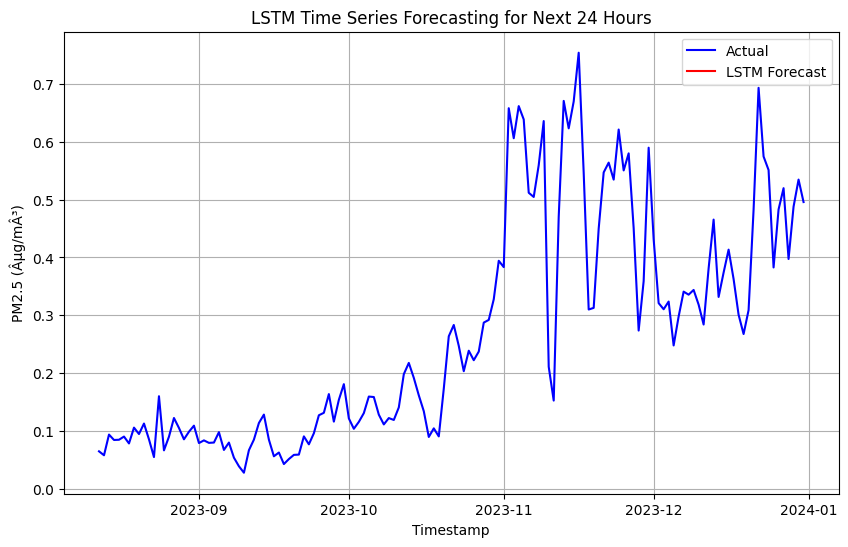

In [12]:
# Visualize LSTM forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'].iloc[train_size + look_back:], y_test, label='Actual', color='blue')
plt.plot(data['Timestamp'].iloc[train_size + look_back:], lstm_forecast, label='LSTM Forecast', color='red')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 (Âµg/mÂ³)')
plt.title('LSTM Time Series Forecasting for Next 24 Hours')
plt.legend()
plt.grid(True)
plt.show()

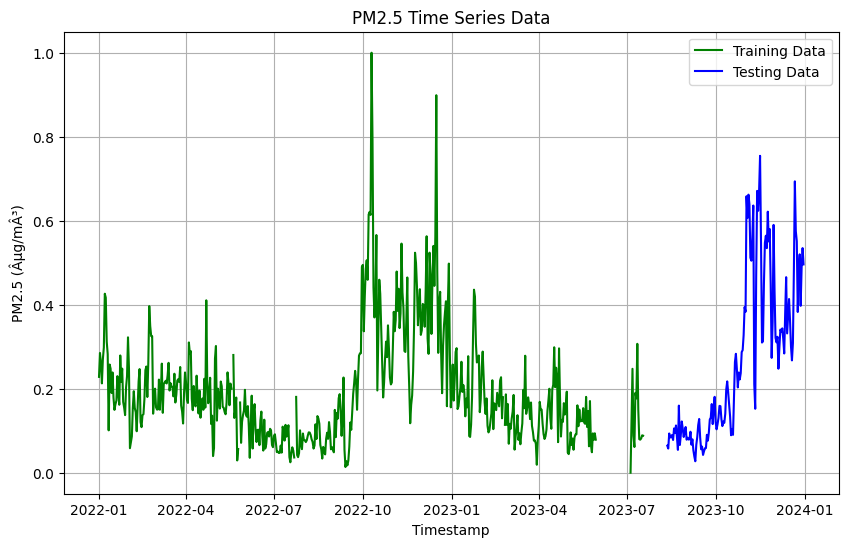

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'].iloc[:train_size], y_train, label='Training Data', color='green')
plt.plot(data['Timestamp'].iloc[train_size + look_back:], y_test, label='Testing Data', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 (Âµg/mÂ³)')
plt.title('PM2.5 Time Series Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
|